In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import f_oneway, normaltest
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu
import math
from scipy import stats
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

In [2]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

#headings = list(filter(lambda x: 'headings' in x and not 'old' in x, files))
headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

#positions = list(filter(lambda x: 'position' in x and not 'old' in x, files))
positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

In [3]:
headings_0 = list(filter(lambda x: 'headings' in x and '_0.' in x, files))
headings_1 = list(filter(lambda x: 'headings' in x and '_1.' in x, files))
headings_2 = list(filter(lambda x: 'headings' in x and '_2.' in x, files))
headings_csv_0 = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings_0]
headings_csv_1 = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings_1]
headings_csv_2 = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings_2]

positions_0 = list(filter(lambda x: 'position' in x and '_0.' in x, files))
positions_1 = list(filter(lambda x: 'position' in x and '_1.' in x, files))
positions_2 = list(filter(lambda x: 'position' in x and '_2.' in x, files))
positions_csv_0 = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions_0]
positions_csv_1 = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions_1]
positions_csv_2 = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions_2]

In [4]:
headings_0

['RTI_Class_headings_Lena_33_F_0.csv',
 'RTI_Class_headings_Gina_36_F_0.csv',
 'RTI_Class_headings_DavidF_25_M_0.csv',
 'RTI_Class_headings_Sara_23_F_old_0.csv',
 'RTI_Class_headings_Alex_26_M_0.csv',
 'RTI_Class_headings_SmrtSapiens_23_M_0.csv',
 'RTI_Class_headings_Jonas_30_M_0.csv',
 'RTI_Class_headings_NataliaM_25_F_old_0.csv',
 'RTI_Class_headings_Cesc_25_M_old_0.csv',
 'RTI_Class_headings_Alex_24_M_old_0.csv']

In [5]:
positions_0

['RTI_Class_positions_NataliaM_25_F_old_0.csv',
 'RTI_Class_positions_Lena_33_F_0.csv',
 'RTI_Class_positions_Gina_36_F_0.csv',
 'RTI_Class_positions_Sara_23_F_old_0.csv',
 'RTI_Class_positions_Alex_26_M_0.csv',
 'RTI_Class_positions_DavidF_25_M_0.csv',
 'RTI_Class_positions_Jonas_30_M_0.csv',
 'RTI_Class_positions_Cesc_25_M_old_0.csv',
 'RTI_Class_positions_SmrtSapiens_23_M_0.csv',
 'RTI_Class_positions_Alex_24_M_old_0.csv']

In [6]:
types = []
errs = []
times = []
times_return = []
return_rates = [] 

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] + 3
    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    return_rate = return_time/time

    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    print(exp_type, 
          #'-->', np.round(return_time,2), 
          '-->', np.round(return_rate,2), 
          '-->', np.round(error,2))
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
    return_rates.append(return_rate)

1 --> 0.56 --> 53.82
0 --> 0.66 --> 147.95
2 --> 0.25 --> 9.09
2 --> 0.5 --> 21.61
0 --> 0.2 --> 7.14
0 --> 0.49 --> 45.04
0 --> 0.32 --> 8.65
0 --> 0.67 --> 214.43
2 --> 0.53 --> 8.58
1 --> 0.29 --> 14.63
2 --> 0.29 --> 30.36
1 --> 0.32 --> 5.53
0 --> 0.32 --> 135.52
1 --> 0.39 --> 39.93
2 --> 0.37 --> 8.37
0 --> 0.39 --> 11.74
2 --> 0.31 --> 9.74
2 --> 0.48 --> 21.13
0 --> 0.39 --> 43.61
1 --> 0.42 --> 31.68
1 --> 0.49 --> 23.46
1 --> 0.54 --> 37.84
0 --> 0.22 --> 42.71
1 --> 0.43 --> 57.33
1 --> 0.28 --> 50.46
0 --> 0.26 --> 24.46
2 --> 0.23 --> 36.65
2 --> 0.26 --> 21.27


In [7]:
color_dict = {'0': 'orange','1': 'blue','2': 'turquoise'}

def plot_path(exp_type):
    
    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.xlim(-220, 180)
    plt.ylim(-100, 300)
    
    csv_list = []
    file_list = []
    
    if (exp_type == '0'): 
        plt.title('Chosen Path - Disorientation')
        csv_list = positions_csv_0[:]
        file_list = positions_0[:]
    elif (exp_type == '1'): 
        plt.title('Chosen Path - No Landmarks')
        csv_list = positions_csv_1[:]
        file_list = positions_1[:]
    elif (exp_type == '2'): 
        plt.title('Chosen Path - Control')
        csv_list = positions_csv_2[:]
        file_list = positions_2[:]
    
    for h, name in zip(csv_list, file_list):
        h = h.dropna(axis=0)
        split_idx = h[h.progress == 0].index[-1] + 3

        plt.plot(h.iloc[:split_idx].x,
                 h.iloc[:split_idx].z,
                 c=color_dict[exp_type], ls=':', alpha=0.8, label='Finding')

        plt.plot(h.iloc[split_idx:].x,
                 h.iloc[split_idx:].z,
                 c=color_dict[exp_type], ls='solid', alpha=1, label='Homing')

        x0 = h.x.iloc[0]
        x1 = h.x.iloc[-1]
        z0 = h.z.iloc[0]
        z1 = h.z.iloc[-1]
        plt.plot([x0, x1], [z0, z1], c='red', marker='*')

    #handles, labels = plt.gca().get_legend_handles_labels()
    #by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys())
    #plt.legend()

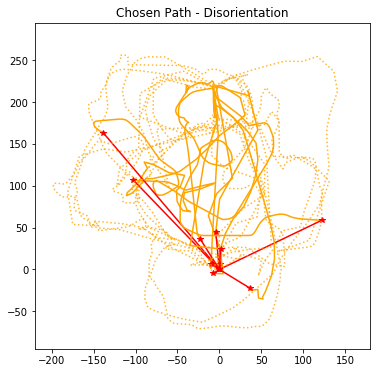

In [8]:
plot_path('0')

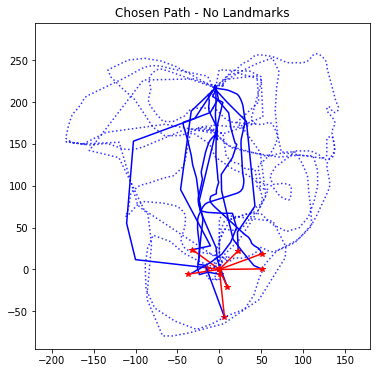

In [9]:
plot_path('1')

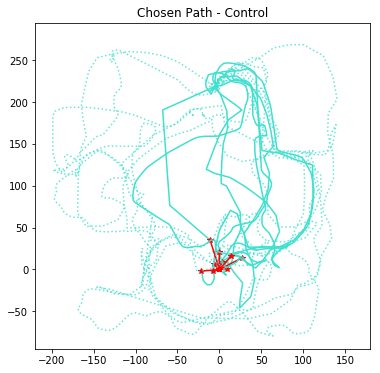

In [10]:
plot_path('2')

In [31]:
def plot_error(exp_type):
    
    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.xlim(-200, 180)
    plt.ylim(-100, 300)
    
    csv_list = []
    file_list = []
    
    if (exp_type == '0'): 
        plt.title('Error - Disorientation')
        csv_list = positions_csv_0[:]
        file_list = positions_0[:]
    elif (exp_type == '1'): 
        plt.title('Error - No Landmarks')
        csv_list = positions_csv_1[:]
        file_list = positions_1[:]
    elif (exp_type == '2'): 
        plt.title('Error - Control')
        csv_list = positions_csv_2[:]
        file_list = positions_2[:]
    
    for h, name in zip(csv_list, file_list):
        h = h.dropna(axis=0)
        split_idx = h[h.progress == 0].index[-1] + 3

        x0 = h.x.iloc[0]
        x1 = h.x.iloc[-1]
        z0 = h.z.iloc[0]
        z1 = h.z.iloc[-1]
        plt.scatter([x1], [z1], s=80, c=color_dict[exp_type], marker='*', label='Estimated home')
        
    plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
    plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='black', marker='x', label='Target')

    #handles, labels = plt.gca().get_legend_handles_labels()
    #by_label = dict(zip(labels, handles))
    #plt.legend(by_label.values(), by_label.keys())
    #plt.legend()

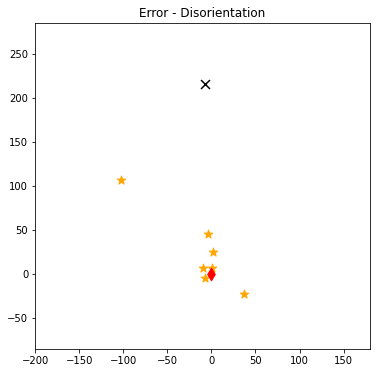

In [32]:
plot_error('0')

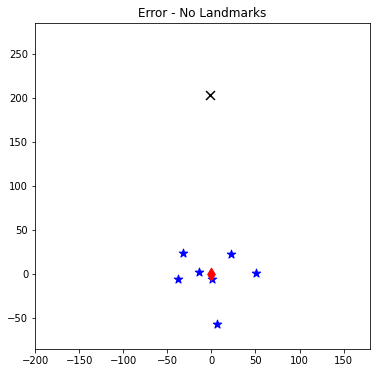

In [33]:
plot_error('1')

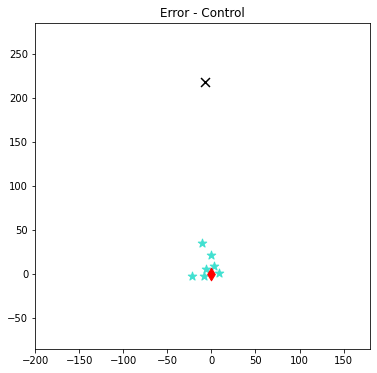

In [34]:
plot_error('2')

In [35]:
results = pd.DataFrame(np.array([types, errs, times, times_return, return_rates]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_time', 'return_rate'])

In [36]:
results

,group,err,time,return_time,return_rate
0,0.0,147.946487,121.001900,80.013031,0.661254
1,2.0,9.089354,150.983795,36.996300,0.245035
2,2.0,21.611198,64.986214,32.787601,0.504532
3,0.0,7.135922,140.793106,28.803200,0.204578
4,0.0,45.038258,69.610878,34.005970,0.488515
5,0.0,8.647261,78.993942,25.003611,0.316526
6,2.0,8.576839,55.000011,29.011570,0.527483
7,1.0,14.630140,167.984604,49.000599,0.291697
8,1.0,5.525801,140.591904,45.604340,0.324374
9,1.0,39.930580,69.006233,26.816750,0.388613


In [37]:
results.groupby('group').count()

,err,time,return_time,return_rate
group,,,,
0.0,7,7,7,7
1.0,7,7,7,7
2.0,7,7,7,7


In [38]:
results.groupby('group')['time'].mean()

group
0.0    100.913712
1.0    104.884384
2.0    106.082283
Name: time, dtype: float32

In [39]:
results.groupby('group')['return_time'].mean()

group
0.0    38.059341
1.0    39.576237
2.0    36.888802
Name: return_time, dtype: float32

In [40]:
results.groupby('group')['return_time'].std()

group
0.0    18.860134
1.0    15.479686
2.0     8.142763
Name: return_time, dtype: float64

In [41]:
results.groupby('group')['return_rate'].mean()

group
0.0    0.388333
1.0    0.381457
2.0    0.380507
Name: return_rate, dtype: float32

In [42]:
results.groupby('group')['return_rate'].std()

group
0.0    0.152073
1.0    0.092130
2.0    0.123507
Name: return_rate, dtype: float64

In [43]:
results.groupby('group')['err'].mean()

group
0.0    41.224449
1.0    33.913979
2.0    16.453377
Name: err, dtype: float32

In [44]:
results.groupby('group')['err'].std()

group
0.0    49.638296
1.0    18.513973
2.0    10.669115
Name: err, dtype: float64

In [45]:
e0 = results[results['group'] == 0]
e1 = results[results['group'] == 1]
e2 = results[results['group'] == 2]

In [46]:
#print(normaltest(e0['return_time']))
#print(normaltest(e1['return_time']))
#print(normaltest(e2['return_time']))

print(f_oneway(e0['return_time'], e1['return_time'], e2['return_time']))

F_onewayResult(statistic=0.05762584979281604, pvalue=0.9441765112626225)


In [47]:
print(pearsonr(e0['time'], e0['err']))
print(pearsonr(e1['time'], e1['err']))
print(pearsonr(e2['time'], e2['err']))

(0.16655678674639324, 0.7211500268840928)
(-0.6081802470557428, 0.14734894720675606)
(0.1842549619111403, 0.6924816901093998)


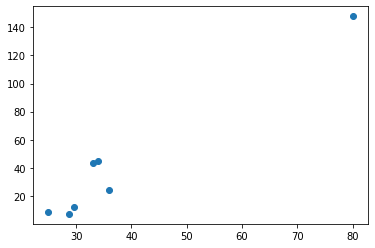

In [48]:
plt.scatter(e0['return_time'], e0['err'])

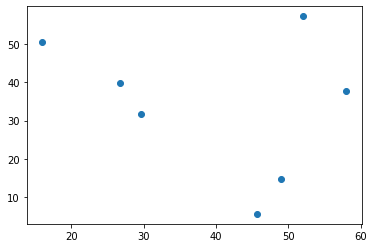

In [49]:
plt.scatter(e1['return_time'], e1['err'])

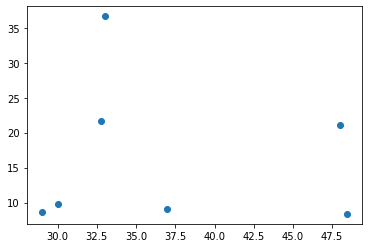

In [50]:
plt.scatter(e2['return_time'], e2['err'])

{'whiskers': [<matplotlib.lines.Line2D at 0x124662470>,
 'caps': [<matplotlib.lines.Line2D at 0x124662a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x124654710>,
 'medians': [<matplotlib.lines.Line2D at 0x124662fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12466f2e8>,
 'means': []}

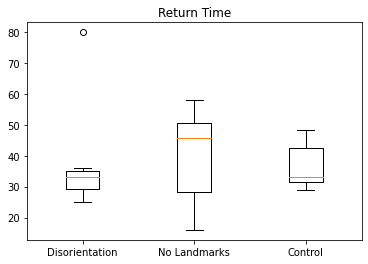

In [52]:
plt.title('Return Time')
plt.boxplot([e0['return_time'], e1['return_time'], e2['return_time']], 
            labels=['Disorientation', 'No Landmarks', 'Control'])

In [53]:
#print(normaltest(e0['return_rate']))
#print(normaltest(e1['return_rate']))
#print(normaltest(e2['return_rate']))

print(f_oneway(e0['return_rate'], e1['return_rate'], e2['return_rate']))

F_onewayResult(statistic=0.008172015493445726, pvalue=0.9918649623410171)


{'whiskers': [<matplotlib.lines.Line2D at 0x124528588>,
 'caps': [<matplotlib.lines.Line2D at 0x124528c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x12452b0f0>,
 'medians': [<matplotlib.lines.Line2D at 0x12378f198>,
 'fliers': [<matplotlib.lines.Line2D at 0x124405eb8>,
 'means': []}

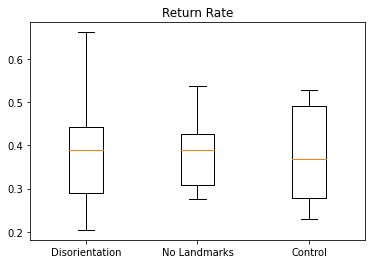

In [54]:
plt.title('Return Rate')
plt.boxplot([e0['return_rate'], e1['return_rate'], e2['return_rate']], 
            labels=['Disorientation', 'No Landmarks', 'Control'])

In [55]:
#print(normaltest(e0['err']))
#print(normaltest(e1['err']))
#print(normaltest(e2['err']))

print(f_oneway(e0['err'], e1['err'], e2['err']))

F_onewayResult(statistic=1.164752137199073, pvalue=0.3344347888580919)


{'whiskers': [<matplotlib.lines.Line2D at 0x12377f0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x123b5b470>,
 'boxes': [<matplotlib.lines.Line2D at 0x12377f860>,
 'medians': [<matplotlib.lines.Line2D at 0x123b5b1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x123b5b630>,
 'means': []}

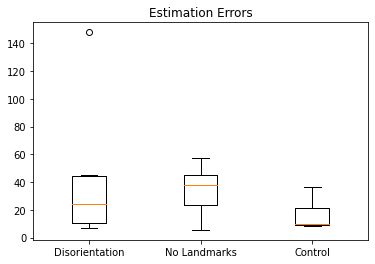

In [56]:
plt.title('Estimation Errors')
plt.boxplot([e0['err'], e1['err'], e2['err']], 
            labels=['Disorientation', 'No Landmarks', 'Control'])

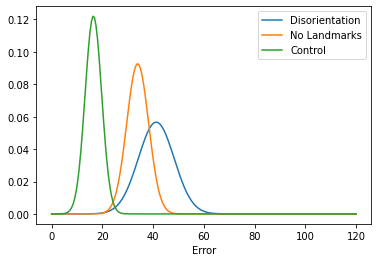

In [57]:
for e, n in zip([e0, e1, e2], ['Disorientation', 'No Landmarks', 'Control']):
    mu = e['err'].mean()
    variance = e['err'].std()
    sigma = math.sqrt(variance)
    x = np.linspace(0, 120, 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=n)
plt.xlabel('Error')
plt.legend()

In [121]:
e0['err']

0     147.946487
3       7.135922
4      45.038258
5       8.647261
11     11.737762
14     43.609173
19     24.456274
Name: err, dtype: float32

In [122]:
e1['err']

7     14.630140
8      5.525801
9     39.930580
15    31.675276
16    37.843102
17    57.331455
18    50.461506
Name: err, dtype: float32

In [123]:
e2['err']

1      9.089354
2     21.611198
6      8.576839
10     8.370060
12     9.743195
13    21.134937
20    36.648048
Name: err, dtype: float32

In [124]:
mannwhitneyu(e0['err'].iloc[1:], e1['err'].iloc[1:])

MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)

In [125]:
h = headings_csv[0]

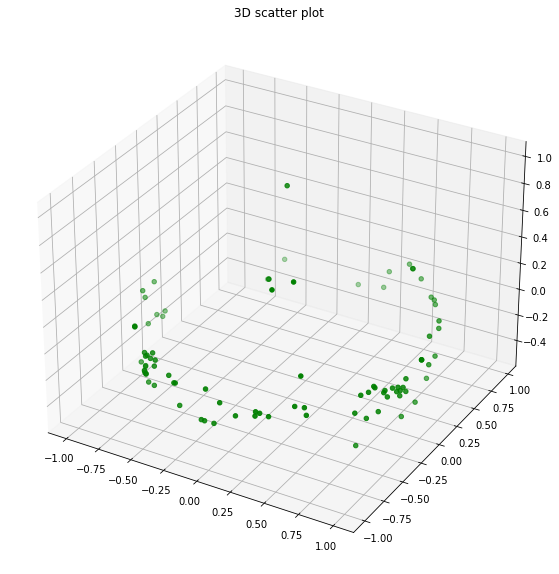

In [126]:
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.z, h.x, h.y, color = "green")
plt.title("3D scatter plot")
 
# show plot
plt.show()

Text(0.5, 1.0, 'Y-Z axes')

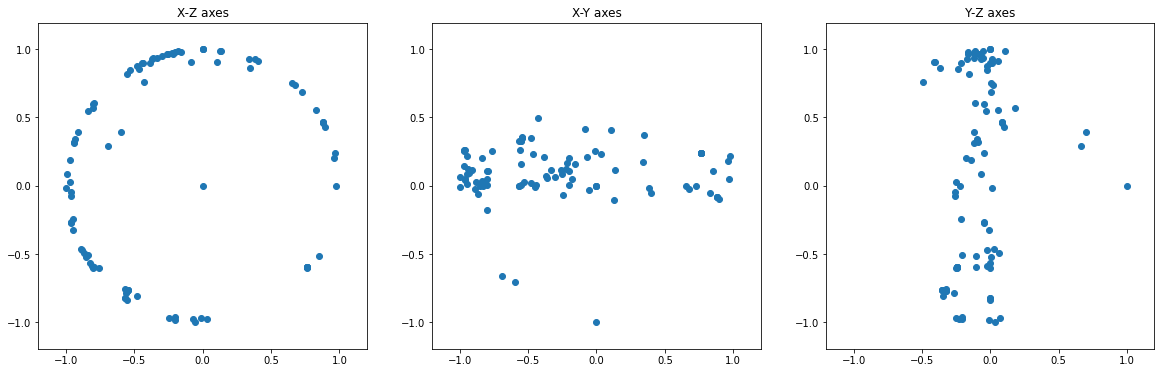

In [127]:
lim = 1.2
plt.figure(figsize=(20, 6))
    
plt.subplot(131)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.title("X-Z axes")

plt.subplot(132)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)
plt.title("X-Y axes")

plt.subplot(133)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.title("Y-Z axes")

Text(0.5, 1.0, 'Y-Z axes')

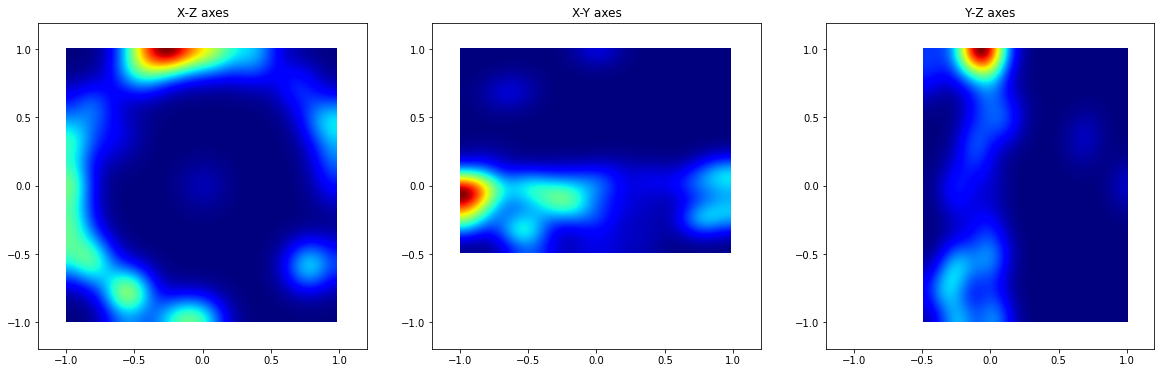

In [128]:
def heading_heatmap(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0] - margin, xedges[-1] + margin, yedges[0] - margin, yedges[-1] + margin]
    return heatmap.T, extent

plt.figure(figsize=(20, 6))
    
plt.subplot(131)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
img, extent = heading_heatmap(h.x, h.z, 64)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title("X-Z axes")

plt.subplot(132)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
img, extent = heading_heatmap(h.x, h.y, 64)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title("X-Y axes")

plt.subplot(133)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
img, extent = heading_heatmap(h.y, h.z, 64)
plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title("Y-Z axes")

In [129]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    phi = np.arctan2(y, x)
    return theta, phi

In [130]:
def spherical_to_cart(p, t):
    x = np.cos(t)*np.sin(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(p)
    return x, y, z

In [131]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

2 --> 11.05


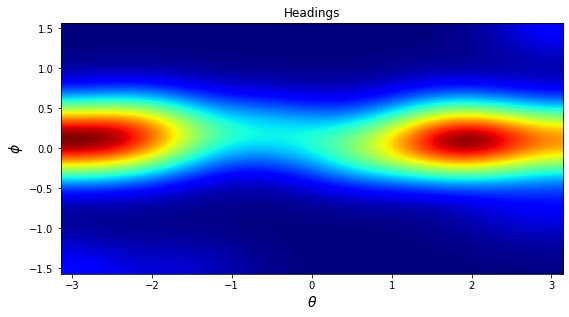

0 --> 10.76


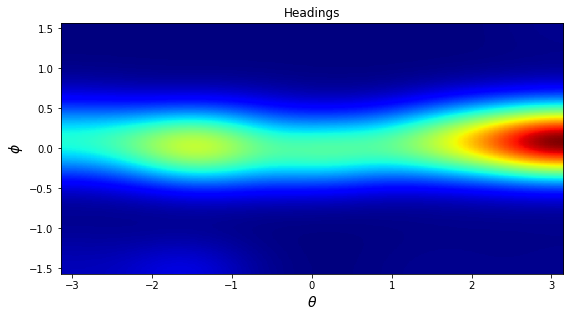

0 --> 11.1


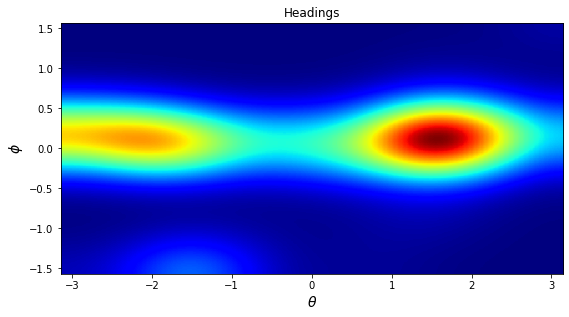

2 --> 10.7


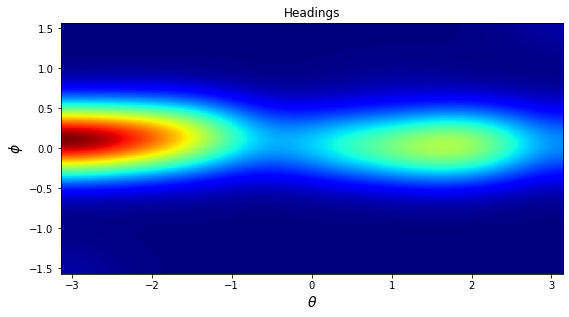

0 --> 10.84


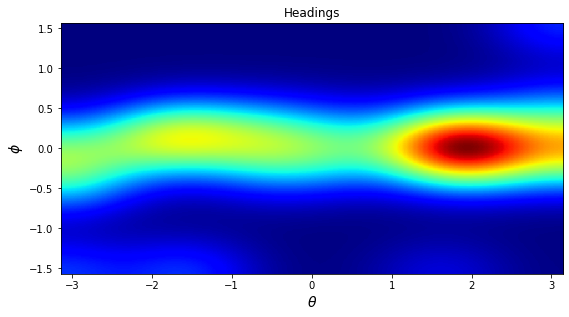

1 --> 11.16


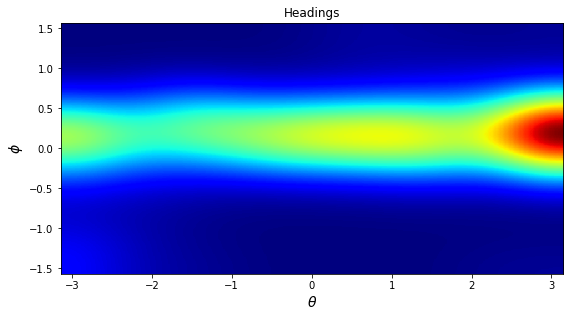

1 --> 10.88


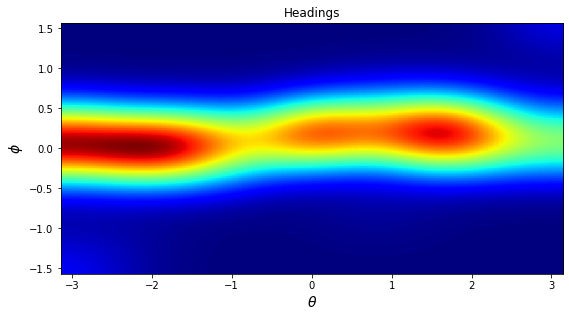

2 --> 11.07


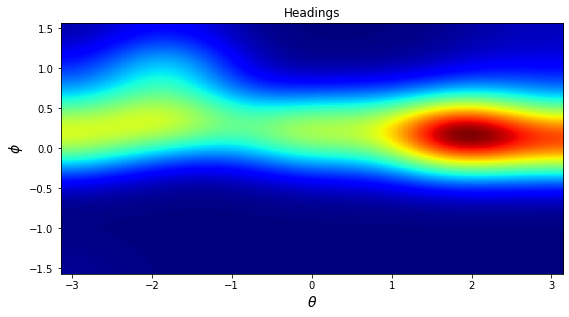

1 --> 11.01


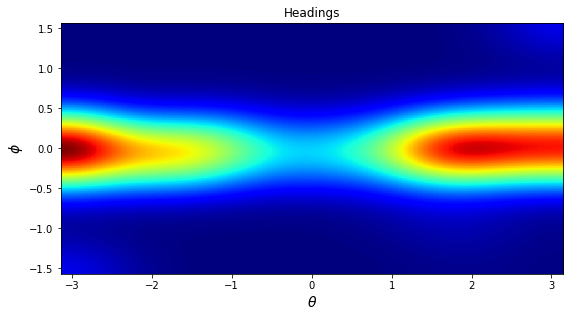

0 --> 10.82


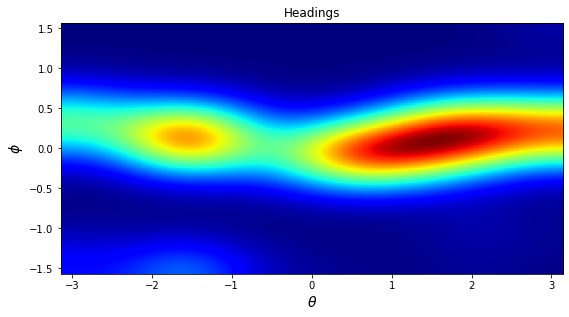

1 --> 10.87


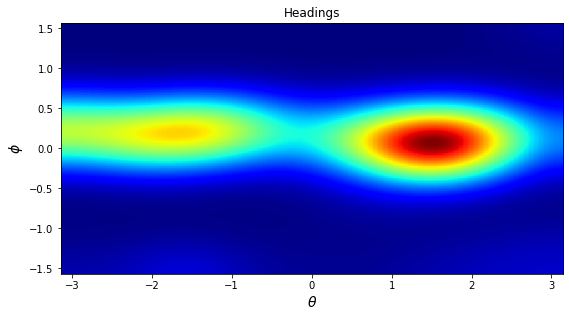

2 --> 11.0


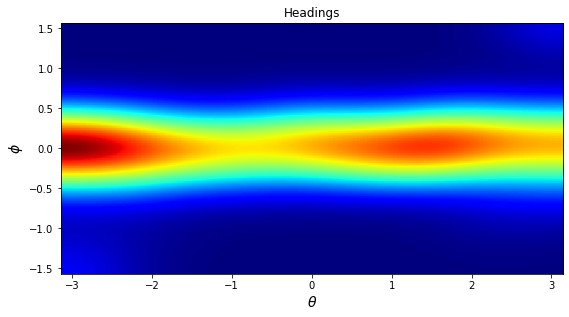

1 --> 10.97


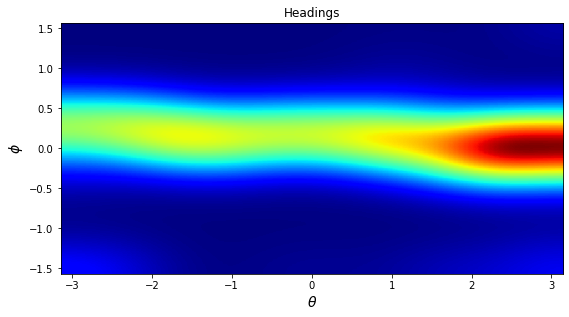

0 --> 11.07


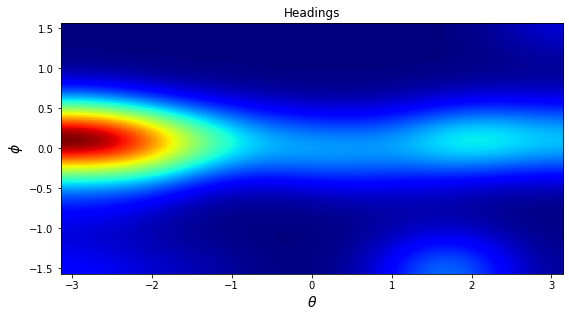

0 --> 11.09


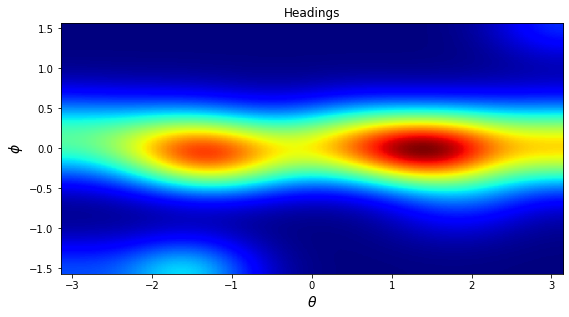

2 --> 11.03


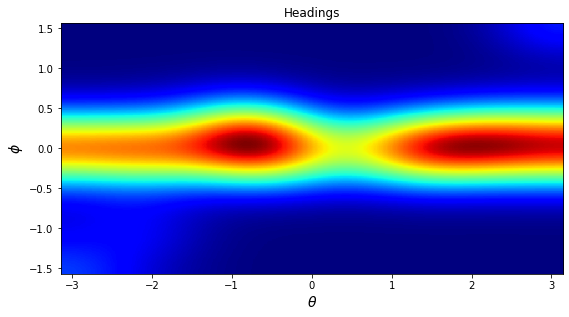

1 --> 11.07


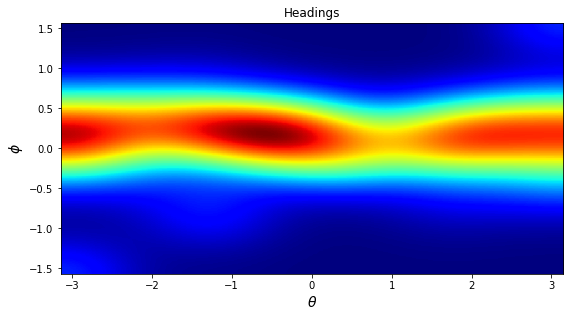

2 --> 11.1


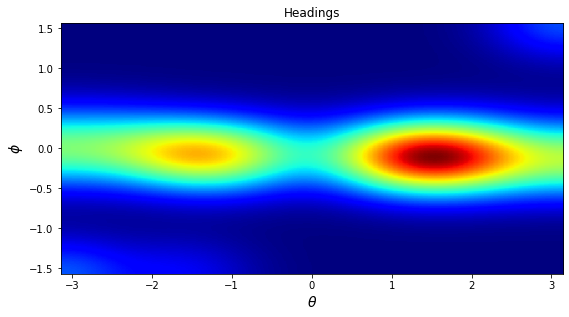

1 --> 10.84


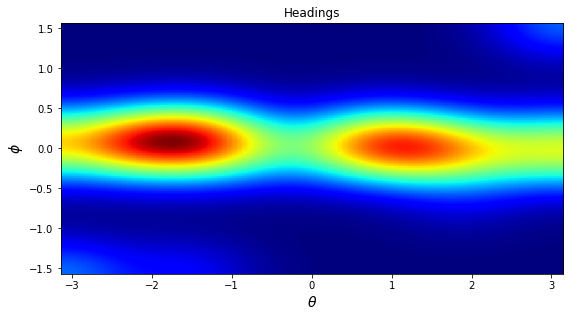

2 --> 10.76


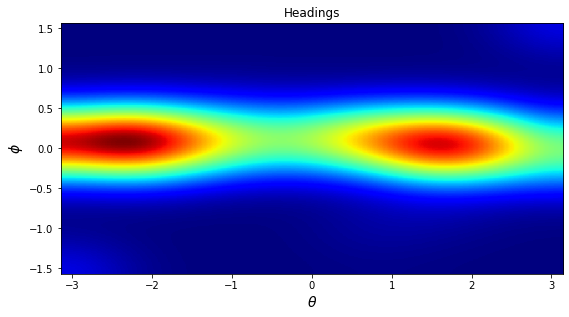

0 --> 10.87


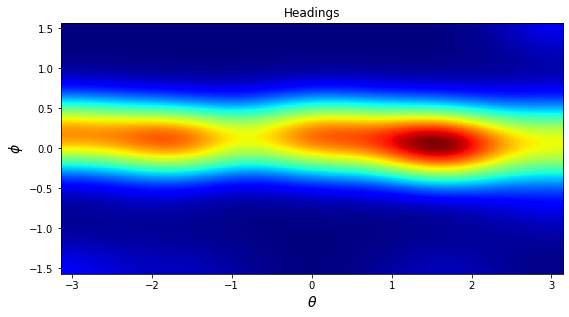

In [132]:
types = []
Hs = []
H2s = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '-->', np.round(H,2))
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t + np.pi/2 + np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = heading_heatmap(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)
    H2s.append(stats.entropy(img.sum(axis=0)))

In [133]:
entropies = pd.DataFrame(np.array([types, Hs, H2s]).T,columns=['group', 'H', 'H2'])

In [134]:
entropies.groupby('group')['H'].count()

group
0.0    7
1.0    7
2.0    7
Name: H, dtype: int64

In [135]:
entropies.groupby('group')['H'].mean()

group
0.0    10.937478
1.0    10.970439
2.0    10.958943
Name: H, dtype: float64

In [136]:
entropies.groupby('group')['H'].std()

group
0.0    0.145511
1.0    0.117882
2.0    0.160779
Name: H, dtype: float64

In [137]:
g1 = entropies[entropies['group'] == 0]['H'].values
g2 = entropies[entropies['group'] == 1]['H'].values
g3 = entropies[entropies['group'] == 2]['H'].values
f_oneway(g1, g2, g3)

F_onewayResult(statistic=0.09648226243362595, pvalue=0.9084923860699587)

In [138]:
entropies.groupby('group')['H2'].mean()

group
0.0    4.566204
1.0    4.577994
2.0    4.572308
Name: H2, dtype: float64

In [139]:
entropies.groupby('group')['H2'].std()

group
0.0    0.036988
1.0    0.019348
2.0    0.024537
Name: H2, dtype: float64

In [140]:
g1_2 = entropies[entropies['group'] == 0]['H2'].values
g2_2 = entropies[entropies['group'] == 1]['H2'].values
g3_2 = entropies[entropies['group'] == 2]['H2'].values
f_oneway(g1_2, g2_2, g3_2)

F_onewayResult(statistic=0.31138137126705717, pvalue=0.7363012760638651)